### 1. 모형 생성

`-` x는 정규분포에서 생성, y의 평균은 x + 50, 정규분포를 따름

- x,y의 상관계수

In [3]:
import numpy as np
x = np.random.normal(size=50)
y = x + 50 + np.random.normal(loc=0, scale=1, size=50)
np.corrcoef(x, y)

array([[1.        , 0.73497261],
       [0.73497261, 1.        ]])

`-` 정규분포를 따르는 난수 생성 방법

- rng는 변수 생성 객체
- 시드가 같으면 난수의 값도 같음
- scale : 표준편차, size : 난수 생성 개수
- standard_normal 표준 정규분포에서 난수 생성

In [12]:
rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=10))

rng2 = np.random.default_rng(1303)
print(rng2.normal(scale=5, size=10))

rng = np.random.default_rng(3)
y = rng.standard_normal(10)
print(y)
np.mean(y), y.mean()

[  4.09482632  -1.07485605 -10.15364596   1.13406146  -4.14030566
  -4.74859823   0.48740125   5.65355173  -2.51588502  -8.07334198]
[  4.09482632  -1.07485605 -10.15364596   1.13406146  -4.14030566
  -4.74859823   0.48740125   5.65355173  -2.51588502  -8.07334198]
[ 2.04091912 -2.55566503  0.41809885 -0.56776961 -0.45264929 -0.21559716
 -2.01998613 -0.23193238 -0.86521308  3.32299952]


(-0.1126795190952861, -0.1126795190952861)

`-` y의 분산을 확인(표본의 크기가 커지면 1에 가까워짐)

In [13]:
print(np.var(y)), y.var()
np.mean((y - y.mean())**2)

2.7243406406465125


2.7243406406465125

### 2. 그래프, 시각화

`-` 그래프 구문 : fig, ax

`-` 기본 plot : 선으로 연결

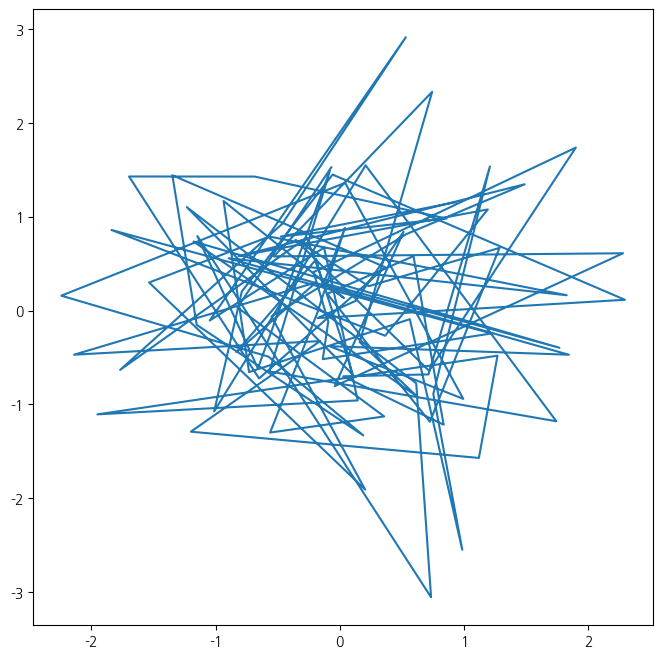

In [15]:
from matplotlib.pyplot import subplots

fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

`-` 그래프 구문 : 산점도 형태로, `'o'`

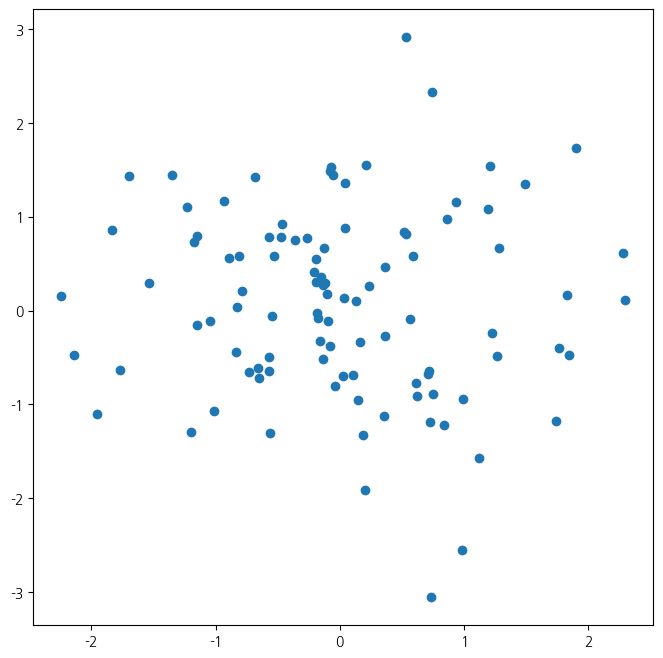

In [17]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

`-` scatter 구문 사용

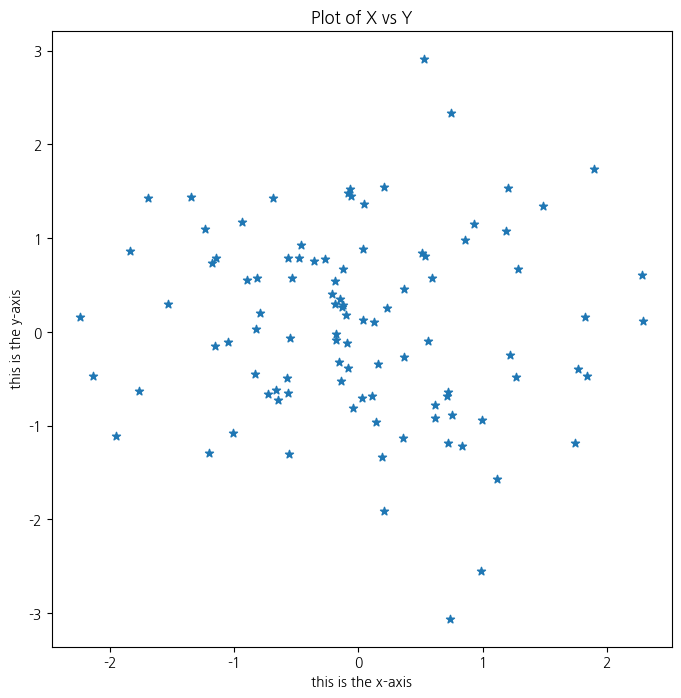

In [18]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='*')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

`-` 여러개 동시에 시각화

- 2X3 행렬 plot : axes를 이용해서 각 그래프를 처리

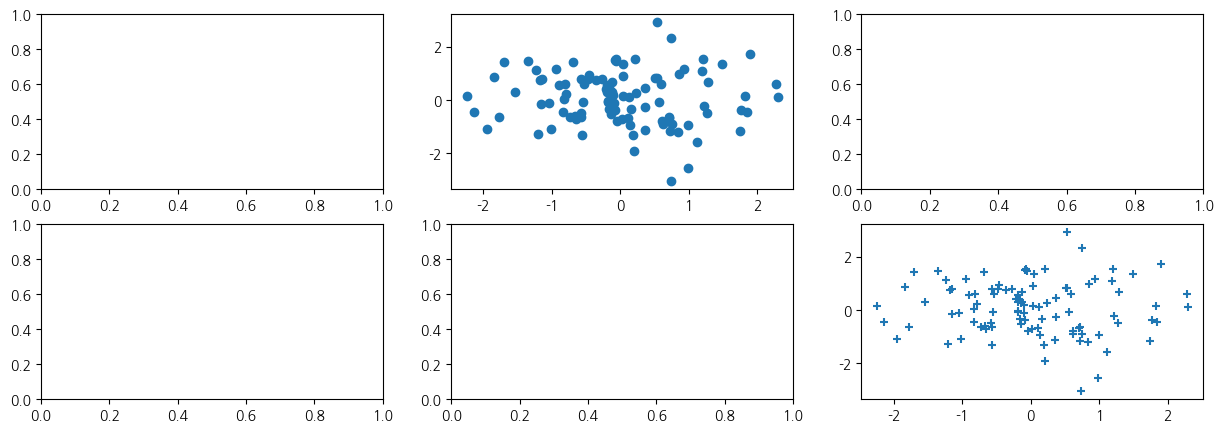

In [23]:
fig, axes = subplots(nrows=2, ncols=3, figsize=(15, 5))
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

# 바깥으로 그림을 저장함
# ---------------------
fig.savefig("Figure.png", dpi=400)

`-` 3차원 등고선 그래프

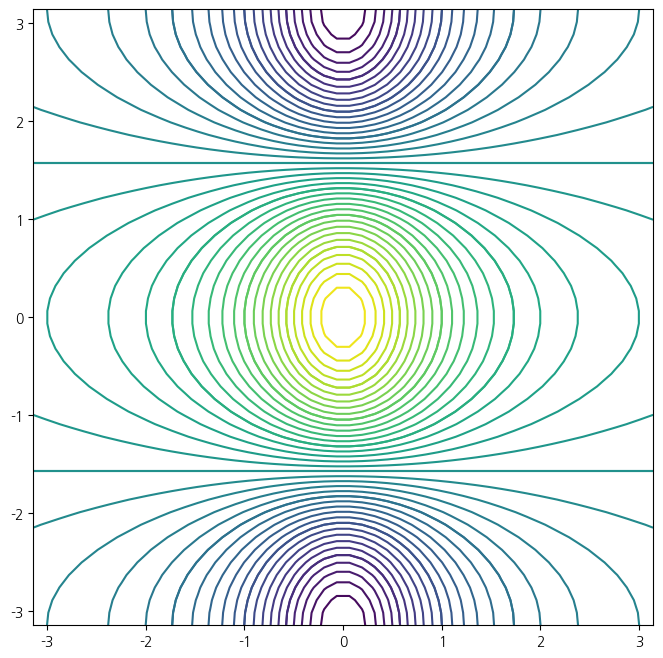

In [25]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
y=x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) # z = f(x,y)
ax.contour(x, y, f);
ax.contour(x, y, f, levels=45);

### 3. 행렬, 데이터 프레임

`-` 행렬 생성

In [27]:
A = np.array(np.arange(16)).reshape((4, 4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

`-` 원하는 행,열만 추출하는 방법1

In [28]:
A[[1,3]][:,[0,3]]

array([[ 4,  7],
       [12, 15]])

`-` 원하는 행,열만 추출하는 방법2

In [31]:
idx = np.ix_([1,3],[0,3])
print(idx)
A[idx]

(array([[1],
       [3]]), array([[0, 3]]))


array([[ 4,  7],
       [12, 15]])

`-` 데이터 프레임

In [34]:
import pandas as pd
Auto = pd.read_csv('Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [35]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


`-` 구별되는 값 확인 및 결측치 제거

* 결측치 제거해도 행이 안사라진걸 보니 결측치 없음

In [40]:
print(np.unique(Auto['horsepower']))

Auto_new = Auto.dropna()
print(Auto.shape)
print(Auto_new.shape)

['100' '102' '103' '105' '107' '108' '110' '112' '113' '115' '116' '120'
 '122' '125' '129' '130' '132' '133' '135' '137' '138' '139' '140' '142'
 '145' '148' '149' '150' '152' '153' '155' '158' '160' '165' '167' '170'
 '175' '180' '190' '193' '198' '200' '208' '210' '215' '220' '225' '230'
 '46' '48' '49' '52' '53' '54' '58' '60' '61' '62' '63' '64' '65' '66'
 '67' '68' '69' '70' '71' '72' '74' '75' '76' '77' '78' '79' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95'
 '96' '97' '98' '?']
(397, 9)
(397, 9)


`-` 인덱스를 행라벨로 바꾸는 작업

* 각 행의 이름표를 'name'변수로 변경
* 변수 하나 줄어듦

In [41]:
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


`-` 데이터 프레임에서 원하는 값 찾는 법

In [42]:
rows = ['amc rebel sst', 'ford torino']
print(Auto_re.loc[rows])
print(Auto_re.iloc[[1,2,3,4],[0,2,3]])

                mpg  cylinders  displacement horsepower  weight  acceleration  \
name                                                                            
amc rebel sst  16.0          8         304.0        150    3433          12.0   
ford torino    17.0          8         302.0        140    3449          10.5   

               year  origin  
name                         
amc rebel sst    70       1  
ford torino      70       1  
                     mpg  displacement horsepower
name                                             
buick skylark 320   15.0         350.0        165
plymouth satellite  18.0         318.0        150
amc rebel sst       16.0         304.0        150
ford torino         17.0         302.0        140


`-` 연도가 80 넘는 것 중 weight 과 origin

In [44]:
idx_80 = Auto_re['year'] > 80
print(Auto_re.loc[idx_80, ['weight', 'origin']])

                                   weight  origin
name                                             
plymouth reliant                     2490       1
buick skylark                        2635       1
dodge aries wagon (sw)               2620       1
chevrolet citation                   2725       1
plymouth reliant                     2385       1
toyota starlet                       1755       3
plymouth champ                       1875       1
honda civic 1300                     1760       3
subaru                               2065       3
datsun 210 mpg                       1975       3
toyota tercel                        2050       3
mazda glc 4                          1985       3
plymouth horizon 4                   2215       1
ford escort 4w                       2045       1
ford escort 2h                       2380       1
volkswagen jetta                     2190       2
renault 18i                          2320       2
honda prelude                        2210       3


`-` 연도가 80을 넘고 mpg가 30이 넘는 것 중 weight와 origin

In [45]:
print(Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
['weight', 'origin'] ])

                                   weight  origin
name                                             
toyota starlet                       1755       3
plymouth champ                       1875       1
honda civic 1300                     1760       3
subaru                               2065       3
datsun 210 mpg                       1975       3
toyota tercel                        2050       3
mazda glc 4                          1985       3
plymouth horizon 4                   2215       1
ford escort 4w                       2045       1
volkswagen jetta                     2190       2
renault 18i                          2320       2
honda prelude                        2210       3
toyota corolla                       2350       3
datsun 200sx                         2615       3
mazda 626                            2635       3
volvo diesel                         3160       2
chevrolet cavalier 2-door            2395       1
pontiac j2000 se hatchback           2575       1


### 4. 데이터 처리

`-` zip 구문을 이용해서 가중평균 계산

In [47]:
total = 0
for value, weight in zip([2,3,19],[0.2,0.3,0.5]):
  total += weight * value
  print('Weighted average is: {0}'.format(total))

Weighted average is: 0.4
Weighted average is: 1.2999999999999998
Weighted average is: 10.8


`-` M에서 np.nan을 이용해 임의로 결측치 생성

In [49]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8,0.2], size=A.shape)
A += M
D = pd.DataFrame(A, columns=['food','bar', 'pickle', 'snack', 'popcorn'])
print(D[:3])

       food       bar    pickle     snack   popcorn
0  0.345584  0.821618  0.330437 -1.303157       NaN
1       NaN -0.536953  0.581118  0.364572  0.294132
2       NaN  0.546713       NaN -0.162910 -0.482119


`-`  nan값의 비율 확인

In [50]:
for col in D.columns:
  template = 'Column "{0}" has {1:.2%} missing values'
  print(template.format(col, np.isnan(D[col]).mean()))
  #print format 0: col, 1: np.isnan(D[col]).mean()
  #col-colname

Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


`-` 상호 관계를 알기 위한 산점도

* 마력이 높으면 연비가 좋다
* (차이가 미묘하게 올라가므로 검증 필요)

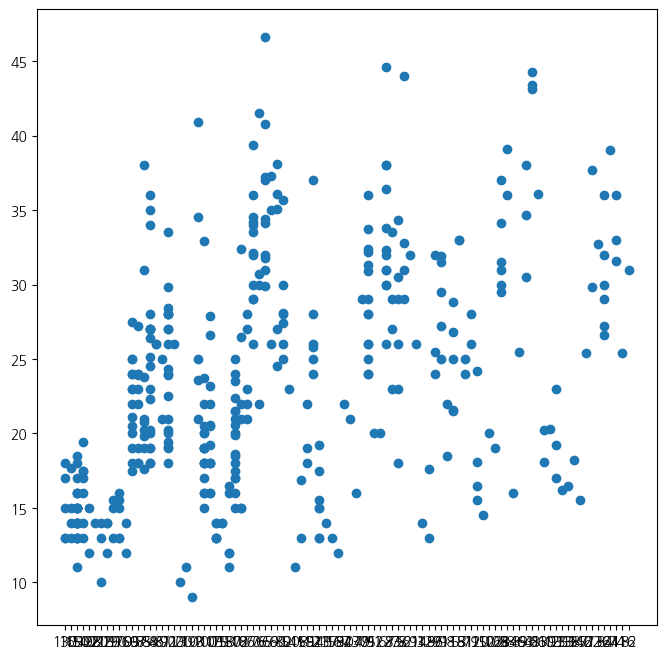

In [52]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');